# Tarea No. 2

## Física Computacional

### Enríquez Mier y Terán Francisco Eduardo 

In [1]:
from pylab import *
from numpy import *
from scipy.integrate import *
%matplotlib inline

#### 1. Realice un programa que encuentre todas las raíces de una función en un intervalo cerrado bajo la suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz.

El siguiente algoritmo usa el método de Newton para encontrar las raíces de una función dada. Con el fin de hacer más compacto el código, primeramente se programa el algoritmo del método de Newton, que permite encontrar una única raiz dado un punto inicial (sabiendo que cerca de ese punto inicial hay una raiz). Posteriormente, en la función $raices\ fun$ se programa el algoritmo que permite encontrar las n raíces de la función en un intervalo dado (se pide como argumento en la función). En el programa, la función dada se evalua en dos puntos continuos pertenecientes al intervalo dado, de tal manera que:

1. Si alguno de las dos evaluaciones en los puntos dados resulta cero, entonces dicho punto, que cumple ser cero al ser evaluado en la función, se guarda en una lista llamada raices.
2. Si el producto de las evaluaciones en los puntos dados resulta menor que cero, que equivale a decir que la función ha pasado por el cero, entonces se llama a la función $met\ newton$ para que encuentre la raiz y esta sea guardada en la lista.



In [2]:
def met_newton(func,d_func,x_i, err = 1e-8): 
    while abs(func(x_i))>= err:
        x_f = x_i - func(x_i)/d_func(x_i)
        x_i = x_f
    return x_f

In [3]:
def raices_fun(func,d_func,intervalo,precision = 0.1,err = 1e-8):
    x = arange(intervalo[0],intervalo[1]+precision,precision)
    raices = []
    for i in range(len(x)-1):
        y1 = func(x[i])
        y2 = func(x[i+1])
        if y1 == 0:
            raices.append(y1)
        elif y2 == 0:
            raices.append(y2)
        elif y1*y2 < 0:
            raiz = met_newton(func,d_func,x[i],err)
            raices.append(raiz)
    return raices

Puesto que el método de Newton hace uso de la derivada de la función, a continuación se programa la función y la derivada de la función para la cual queremos encontrar las raíces.

In [4]:
def f1(x):
    return cos(x)+(6/5.)*sin(x*x)
def d_f1(x):
    return -sin(x)+(12/5.)*x*cos(x*x)

Las raíces de la función:
$$
y(x) = cos(x) +\frac{6}{5}sin(x^2)
$$
son:

In [5]:
raices_fun(f1,d_f1,[0,2*pi],0.001)

[1.7337718231231769,
 2.668090745537147,
 2.9117361384929952,
 3.6574888521253377,
 3.8785165965363997,
 4.3737883799928534,
 4.6872368328907328,
 4.9902059862472896,
 5.3671787299261631,
 5.5454005310099648,
 5.9553871274614414,
 6.0621549500060175]

A continuación se anexa la gráfica de la función en el intervalo $x \in [0,2\pi]$

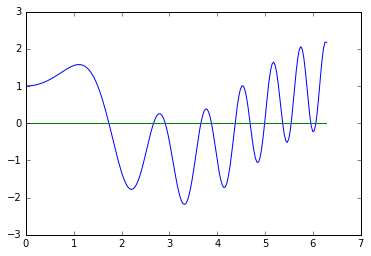

In [6]:
x = linspace(0,2*pi,200)
y = cos(x)+(6/5.)*sin(x*x)
y2 = 0*x
plot(x,y,x,y2)
show()

Notamos que con el programa $raices\ fun$ se encontraron 12 raíces, mismas 12 raíces que podemos apreciar en la gráfica para el intervalo ya antes mencionado. 

#### 2. Se tiene la siguiente función:
$$
f(x,y) = 2e^{-(x+1)^2}\left (e^{-(y+2)^2}+e^{-(y-2)^2}\right )+6x(x^2 + y^2)e^{-(x^2+y^2)}-1
$$

#### Encuentre los puntos $(x_i,y_i)$ tales que $f(x_i,y_i) = 0$ y dibuje estos puntos en el plano xy

El algoritmo a seguir es en esencia el mismo que se usó para el ejercicio 1, sin embargo, puesto que $f$ es una función de dos variables se procede a evaluar la función para una $x$ fija a lo largo del intervalo en $y$, de tal manera que:
1. El método de Newton se reprograma para una función de dos variables (con barridos con $x$ fija).
2. La función $raices\ funv$ pide como argumentos la función, la derivada de la función (derivada parcial respecto a $y$), el intervalo en $x$ y el intervalo en $y$.

In [7]:
def met_newton_xf(func,d_func,p_ini,err = 1e-8):
    while abs(func(p_ini[0],p_ini[1]))>= err:
        y_f = p_ini[1] - func(p_ini[0],p_ini[1])/d_func(p_ini[0],p_ini[1])
        p_ini[1]= y_f
    return y_f

In [8]:
def raices_funv(func,d_func,intervalo_x,intervalo_y,precision=0.1,err = 1e-8):
    x = arange(intervalo_x[0],intervalo_x[1]+precision,precision)
    y = arange(intervalo_y[0],intervalo_y[1]+precision,precision)
    raices = [[],[]]
    for i in range(len(y)-1):
        for j in range(len(x)-1):
            f1 = func(x[j],y[i])
            f2 = func(x[j],y[i+1])
            if f1 == 0:
                raices[0].append(x[j]),raices[1].append(y[i])
            elif f2 == 0:
                raices[0].append(x[j]),raices[1].append(y[i+2])
            elif f1*f2 < 0:
                raices[0].append(x[j]),raices[1].append(met_newton_xf(func,d_func,[x[j],y[i]],err))
    return raices

Se define la función:

In [9]:
def f2_v(x,y):
    return 6*x*(x**2 + y**2)*exp(-x**2 - y**2) + 2*(exp(-(y + 2)**2) + exp(-(y - 2)**2))*exp(-(x + 1)**2) - 1

Se calcula la derivada parcial respecto a $y$ de la función:

In [10]:
def dy_f2_v(x,y):
    return -12*x*y*(x**2 + y**2)*exp(-x**2 - y**2) + 12*x*y*exp(-x**2 - y**2) + 2*((-2*y - 4)*exp(-(y + 2)**2) + (-2*y + 4)*exp(-(y - 2)**2))*exp(-(x + 1)**2)

Se calculan las raices de la función, con una precisión de 0.05 en los barridos a lo largo de cada eje.

In [11]:
raices = raices_funv(f2_v,dy_f2_v,[-4,4],[-4,4],0.02)

En la siguiente gráfica se muestran las raices de la función $f(x,y)$ para el intervalo $[-4,4] \times [-4,4]$

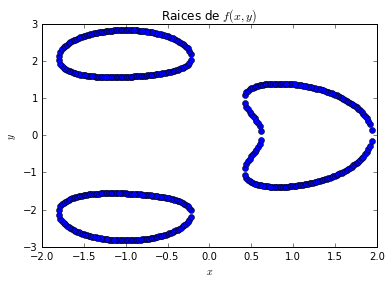

In [12]:
plot(raices[0],raices[1],"o")
xlabel("$x$")
ylabel("$y$")
title("Raices de $f(x,y)$")
show()

#### 3. Se tiene una pleota de masa $m$ sobre un plano inclinado a un ángulo de $\alpha = 15^{\circ}, 30^{\circ} y\ 45 ^{\circ}$

#### a) Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $v_{0x},v_{0y} > 0$ considerando que hay fricción con el aire proporcional a la velocidad

Se definen las ecuaciones a integrar ("$ec\ mov$"), que rigen el movimiento de la pelota sobre el plano inclinado. Las ecuaciones de fricción, "$fric\ v$": fricción proporcional a la velocidad y "$fric\ v^2$": fricción proporcional al cuadrado de la velocidad, se definen por separado. Por default la ecuación se resuelve sin fricción alguna y para un plano horizontal.

In [13]:
def ec_mov(r_v,t,alfa=0,fric=0,g=9.8,m=1.):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx = (g/m)*sin(alfa)
        dvy = -(g/m)*cos(alfa)
    else:
        dvx = (g/m)*sin(alfa)-fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m)*cos(alfa)-fric([r_v[2],r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

In [14]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])
def fric_v2(v,gamma=0.1):
    norma_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norma_v*v[0]
    f_y = gamma*norma_v*v[1]
    return array([f_x,f_y]) 

La función "$sol\ ecmov$" resuelve el problema para una condición inicial dada $[x_0,y_0,vx_0,vy_0]$ (cabe resaltar que el programa está hecho para una condición inicial de la forma: $[0,h,vx_0,vy_0]$, es decir, la pelota se encuentra justo en el eje $y$, y se encuentra a una altura $h$, que es la altura del plano inclinado al cruzar por dicho eje.), un tiempo ("$delta\ t$") que corresponde al intervalo para el cual se hará la integración de cada punto, el número de integraciones deseadas ("$no\ puntos$") y los argumentos opcionales de la ecuación, que son $\alpha$: ángulo que forma el plano con el eje horizontal y $fric$ que corresponde a si hay o no fricción en el aire.

La ecuación se resuelve para un sistema $x'y'$, cuyo eje horizontal está justo en el plano inclinado, y cuyo eje vertical es normal al plano. Después de hallar la solución a la ecuación en el sistema primado se hace uso de la matriz de rotación de tal manera que se hallan las soluciones para $x$ y $y$ en el sistema $xy$ convencional.


In [15]:
def sol_ecmov(p_ini,delta_t,no_puntos,alfa=0,fric=0,g=9.8,m=1.):
    py = p_ini[1]
    p_0 = array([p_ini[0],0,p_ini[2],p_ini[3]])
    N = no_puntos
    dt = linspace(0,delta_t)
    trayectoria = zeros((N,len(p_0)))
    trayectoria [0,:] = array(p_0)
    for i in range(N-1):
        solucion = odeint(ec_mov,trayectoria[i,:],dt,args =(alfa,fric))
        if solucion[-1,:][1]<0:
            dt_busq = dt/2.
            y1= trayectoria[i,:]
            sol = odeint(ec_mov,y1,dt_busq,args=(alfa,fric))
            y2= sol[-1,:]
            while abs(y1[1]) > 1e-5:
                if y1[1]*y2[1] <0:
                    y3 = y1
                else:
                    y3 = y2
                dt_busq = dt_busq/2.
                sol = odeint(ec_mov,y3,dt_busq,args=(alfa,fric))
                y1 = y3
                y2 = sol[-1,:]
            y1 = array([y1[0],y1[1],y1[2],-y1[3]])
            trayectoria[i+1,:] = y1
        else:
            trayectoria[i+1,:] = solucion[-1,:]
    x= zeros(N)
    y= zeros(N)
    x[:] = trayectoria[:,0]*cos(alfa)+trayectoria[:,1]*sin(alfa)
    y[:] = -trayectoria[:,0]*sin(alfa)+(trayectoria[:,1])*cos(alfa)+py
    return array([x,y])

Se toma una condición inicial con $y_0 = h = 15$, y se resuelve la ecuación para una fricción proporcional a la velocidad. 
Cabe resaltar que el número de puntos para cada integración fueron tomados de tal manera que la integración terminara cuando el plano pasa por el eje horizontal, es decir, cuando la pelota ha llegado el piso. 

De igual manera, se grafica una linea recta con pendiente igual a $(-\alpha)$ con el fin de poder visualizar el plano sobre el cual va rebotando la pelota.

In [16]:
y0 = 15
alfa45 = sol_ecmov([0,y0,3,4],0.1,23,pi/4,fric_v)
alfa30 = sol_ecmov([0,y0,3,4],0.1,34,pi/6,fric_v)
alfa15 = sol_ecmov([0,y0,3,4],0.1,70,pi/12,fric_v)

Para $\alpha = 45^{\circ}$:

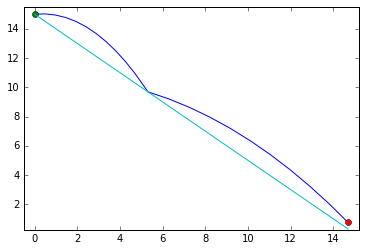

In [17]:
plot(alfa45[0],alfa45[1])
plot(alfa45[0][0],alfa45[1][0],"o")
plot(alfa45[0][-1],alfa45[1][-1],"o")
plot(alfa45[0],-tan(pi/4)*alfa45[0]+y0)
xlim(min(alfa45[0]-0.5),max(alfa45[0])+0.5)
ylim(min(alfa45[1])-0.5,max(alfa45[1])+0.5)
show()

Para $\alpha = 30^{\circ}$:

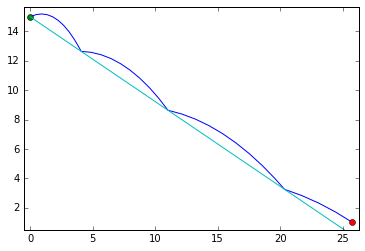

In [18]:
plot(alfa30[0],alfa30[1])
plot(alfa30[0][0],alfa30[1][0],"o")
plot(alfa30[0][-1],alfa30[1][-1],"o")
plot(alfa30[0],-tan(pi/6)*alfa30[0]+y0)
xlim(min(alfa30[0]-0.5),max(alfa30[0])+0.5)
ylim(min(alfa30[1])-0.5,max(alfa30[1])+0.5)
show()

Para $\alpha = 15^{\circ}$:

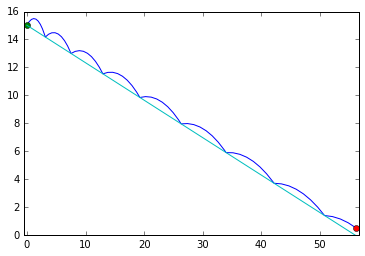

In [19]:
plot(alfa15[0],alfa15[1])
plot(alfa15[0][0],alfa15[1][0],"o")
plot(alfa15[0][-1],alfa15[1][-1],"o")
plot(alfa15[0],-tan(pi/12)*alfa15[0]+y0)
xlim(min(alfa15[0]-0.5),max(alfa15[0])+0.5)
ylim(min(alfa15[1])-0.5,max(alfa15[1])+0.5)
show()

#### b) Realice la misma simulación si ahora la fricción es proporcional al cuadrado de la velocidad 

Nuevamente se hace uso del programa "$sol\ ecmov$", con la única variante de que en argumentos opcionales se agrega la condición de que la fricción es propocional al cuadrado de la velocidad.


In [20]:
alfa45v2 = sol_ecmov([0,y0,3,4],0.1,32,pi/4,fric_v2)
alfa30v2 = sol_ecmov([0,y0,3,4],0.1,52,pi/6,fric_v2)
alfa15v2 = sol_ecmov([0,y0,3,4],0.1,144,pi/12,fric_v2)

Para $\alpha = 45^{\circ}$:

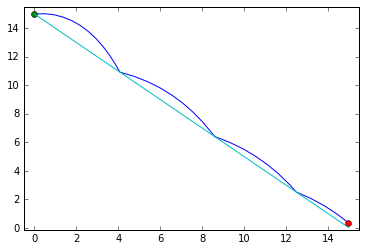

In [21]:
plot(alfa45v2[0],alfa45v2[1])
plot(alfa45v2[0][0],alfa45v2[1][0],"o")
plot(alfa45v2[0][-1],alfa45v2[1][-1],"o")
plot(alfa45v2[0],-tan(pi/4)*alfa45v2[0]+y0)
xlim(min(alfa45v2[0]-0.5),max(alfa45v2[0])+0.5)
ylim(min(alfa45v2[1])-0.5,max(alfa45v2[1])+0.5)
show()

Para $\alpha = 30^{\circ}$:

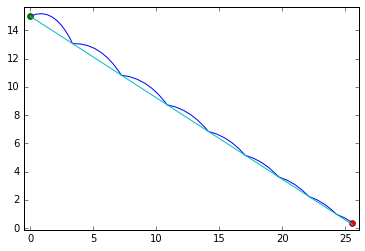

In [22]:
plot(alfa30v2[0],alfa30v2[1])
plot(alfa30v2[0][0],alfa30v2[1][0],"o")
plot(alfa30v2[0][-1],alfa30v2[1][-1],"o")
plot(alfa30v2[0],-tan(pi/6)*alfa30v2[0]+y0)
xlim(min(alfa30v2[0]-0.5),max(alfa30v2[0])+0.5)
ylim(min(alfa30v2[1])-0.5,max(alfa30v2[1])+0.5)
show()

Para $\alpha = 15^{\circ}$:

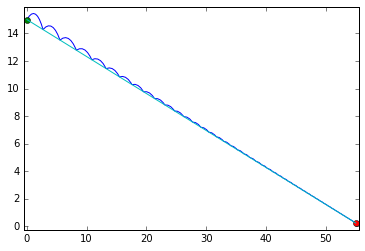

In [23]:
plot(alfa15v2[0],alfa15v2[1],)
plot(alfa15v2[0][0],alfa15v2[1][0],"o")
plot(alfa15v2[0][-1],alfa15v2[1][-1],"o")
plot(alfa15v2[0],-tan(pi/12)*alfa15v2[0]+y0)
xlim(min(alfa15v2[0]-0.5),max(alfa15v2[0])+0.5)
ylim(min(alfa15v2[1])-0.5,max(alfa15v2[1])+0.5)
show()

#### ¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $vx_0 < 0$ tal que: $tan^{-1}\left (\frac{vy_0}{vx_0}\right ) > \alpha $

Se toma como condición incial = $[0,h=7,-6,4]$ (para los primeros dos ángulos ($\alpha = 45^{\circ}, 30^{\circ}$) y $[0,h=4,-6,4]$ para el último ángulo. Se resuelve la ecuación para una fricción en el aire proporcional al cuadrado de la velocidad. 

In [24]:
alfa45v3 = sol_ecmov([0,7,-6,4],0.1,32,pi/4,fric_v2)
alfa30v3 = sol_ecmov([0,7,-6,4],0.1,48,pi/6,fric_v2)
alfa15v3 = sol_ecmov([0,4,-6,4],0.1,80,pi/12,fric_v2)

Para $\alpha = 45^{\circ}:$

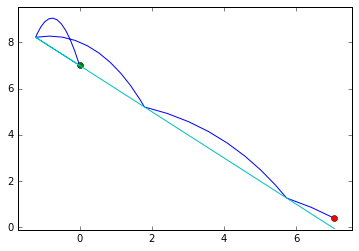

In [25]:
plot(alfa45v3[0],alfa45v3[1])
plot(alfa45v3[0][0],alfa45v3[1][0],"o")
plot(alfa45v3[0][-1],alfa45v3[1][-1],"o")
plot(alfa45v3[0],-tan(pi/4)*alfa45v3[0]+7)
xlim(min(alfa45v3[0]-0.5),max(alfa45v3[0])+0.5)
ylim(min(alfa45v3[1])-0.5,max(alfa45v3[1])+0.5)
show()

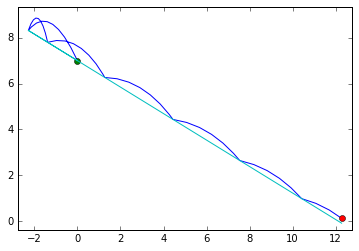

In [26]:
plot(alfa30v3[0],alfa30v3[1])
plot(alfa30v3[0][0],alfa30v3[1][0],"o")
plot(alfa30v3[0][-1],alfa30v3[1][-1],"o")
plot(alfa30v3[0],-tan(pi/6)*alfa30v3[0]+7)
xlim(min(alfa30v3[0]-0.5),max(alfa30v3[0])+0.5)
ylim(min(alfa30v3[1])-0.5,max(alfa30v3[1])+0.5)
show()

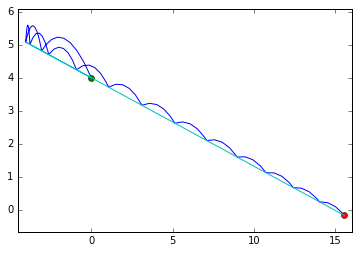

In [27]:
plot(alfa15v3[0],alfa15v3[1])
plot(alfa15v3[0][0],alfa15v3[1][0],"o")
plot(alfa15v3[0][-1],alfa15v3[1][-1],"o")
plot(alfa15v3[0],-tan(pi/12)*alfa15v3[0]+4)
xlim(min(alfa15v3[0]-0.5),max(alfa15v3[0])+0.5)
ylim(min(alfa15v3[1])-0.5,max(alfa15v3[1])+0.5)
show()

De donde notamos que si $vx_0 <0 $ y cumple la condición impuesta de $tan^{-1}(\frac{vy_0}{vx_0}) > \alpha $, la pelota en inicio sube a través del plano para posteriormente comenzar a descender. 